In [ ]:
!pip install scrapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.2/97.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}


##**A. Looping through multiple pages**

One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.
Okay, now let’s put this to work in a function:

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

##**We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.**##

##**Add this to the bottom of the function above.**##


In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Apple-iPhone-128GB-Deep-Purple/product-reviews/B0BDJ6ZMCC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-8-b912e7558067>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
reviews = pd.DataFrame(reviewlist)
reviews

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023
1,4.0,4.0 out of 5 stars\nOverall performance,Phone is good but battery support is weak no h...,9 September 2023
2,4.0,4.0 out of 5 stars\nGood Buy,Decent phone with all the required features in...,14 September 2023
3,4.0,4.0 out of 5 stars\nOkay Okay,Camera clarity not good,10 September 2023
4,4.0,4.0 out of 5 stars\nGood,Okay,12 September 2023
...,...,...,...,...
195,5.0,5.0 out of 5 stars\nNice,The media could not be loaded.\n ...,7 May 2023
196,5.0,5.0 out of 5 stars\nCamera Quality,Apple knows how to grab the customers from oth...,28 December 2022
197,5.0,5.0 out of 5 stars\nBest phone,,17 March 2023
198,5.0,5.0 out of 5 stars\nIt's great but,The phone is amazing but full of software bugs...,6 March 2023


In [21]:
reviews.to_csv('reviews.csv')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [35]:
reviews = pd.read_csv('reviews.csv')
reviews

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023
1,1,4.0,4.0 out of 5 stars\nOverall performance,Phone is good but battery support is weak no h...,9 September 2023
2,2,4.0,4.0 out of 5 stars\nGood Buy,Decent phone with all the required features in...,14 September 2023
3,3,4.0,4.0 out of 5 stars\nOkay Okay,Camera clarity not good,10 September 2023
4,4,4.0,4.0 out of 5 stars\nGood,Okay,12 September 2023
...,...,...,...,...,...
195,195,5.0,5.0 out of 5 stars\nNice,The media could not be loaded.\n ...,7 May 2023
196,196,5.0,5.0 out of 5 stars\nCamera Quality,Apple knows how to grab the customers from oth...,28 December 2022
197,197,5.0,5.0 out of 5 stars\nBest phone,NaN,17 March 2023
198,198,5.0,5.0 out of 5 stars\nIt's great but,The phone is amazing but full of software bugs...,6 March 2023


In [36]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)

In [37]:
reviews.Rating.describe()

count    200.0000
mean       4.2100
std        0.8363
min        1.0000
25%        4.0000
50%        4.0000
75%        5.0000
max        5.0000
Name: Rating, dtype: float64

In [38]:
reviews

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023
1,4.0,4.0 out of 5 stars\nOverall performance,Phone is good but battery support is weak no h...,9 September 2023
2,4.0,4.0 out of 5 stars\nGood Buy,Decent phone with all the required features in...,14 September 2023
3,4.0,4.0 out of 5 stars\nOkay Okay,Camera clarity not good,10 September 2023
4,4.0,4.0 out of 5 stars\nGood,Okay,12 September 2023
...,...,...,...,...
195,5.0,5.0 out of 5 stars\nNice,The media could not be loaded.\n ...,7 May 2023
196,5.0,5.0 out of 5 stars\nCamera Quality,Apple knows how to grab the customers from oth...,28 December 2022
197,5.0,5.0 out of 5 stars\nBest phone,NaN,17 March 2023
198,5.0,5.0 out of 5 stars\nIt's great but,The phone is amazing but full of software bugs...,6 March 2023


In [41]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0      11
1       9
2      14
3      10
4      12
       ..
195     7
196    28
197    17
198     6
199    26
Name: Review_Date, Length: 200, dtype: object 
 0      September
1      September
2      September
3      September
4      September
         ...    
195          May
196     December
197        March
198        March
199     February
Name: Review_Date, Length: 200, dtype: object 
 0      2023
1      2023
2      2023
3      2023
4      2023
       ... 
195    2023
196    2022
197    2023
198    2023
199    2023
Name: Review_Date, Length: 200, dtype: object


In [42]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,11,September,2023
1,9,September,2023
2,14,September,2023
3,10,September,2023
4,12,September,2023
...,...,...,...
195,7,May,2023
196,28,December,2022
197,17,March,2023
198,6,March,2023


In [43]:
df.Month.value_counts()

August       61
September    32
July         22
April        12
May          12
October      11
March        11
February     10
November      9
December      8
January       6
June          6
Name: Month, dtype: int64

In [57]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,9
1,9
2,9
3,9
4,9
...,...
195,5
196,12
197,3
198,3


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       200 non-null    float64
 1   Title        200 non-null    object 
 2   Review       195 non-null    object 
 3   Review_Date  200 non-null    object 
 4   Date         200 non-null    object 
 5   Month        200 non-null    int64  
 6   Year         200 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 11.1+ KB


In [59]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11,9,2023
1,4.0,4.0 out of 5 stars\nOverall performance,Phone is good but battery support is weak no h...,9,9,2023
2,4.0,4.0 out of 5 stars\nGood Buy,Decent phone with all the required features in...,14,9,2023
3,4.0,4.0 out of 5 stars\nOkay Okay,Camera clarity not good,10,9,2023
4,4.0,4.0 out of 5 stars\nGood,Okay,12,9,2023


#**DATA VISUALIZATION**

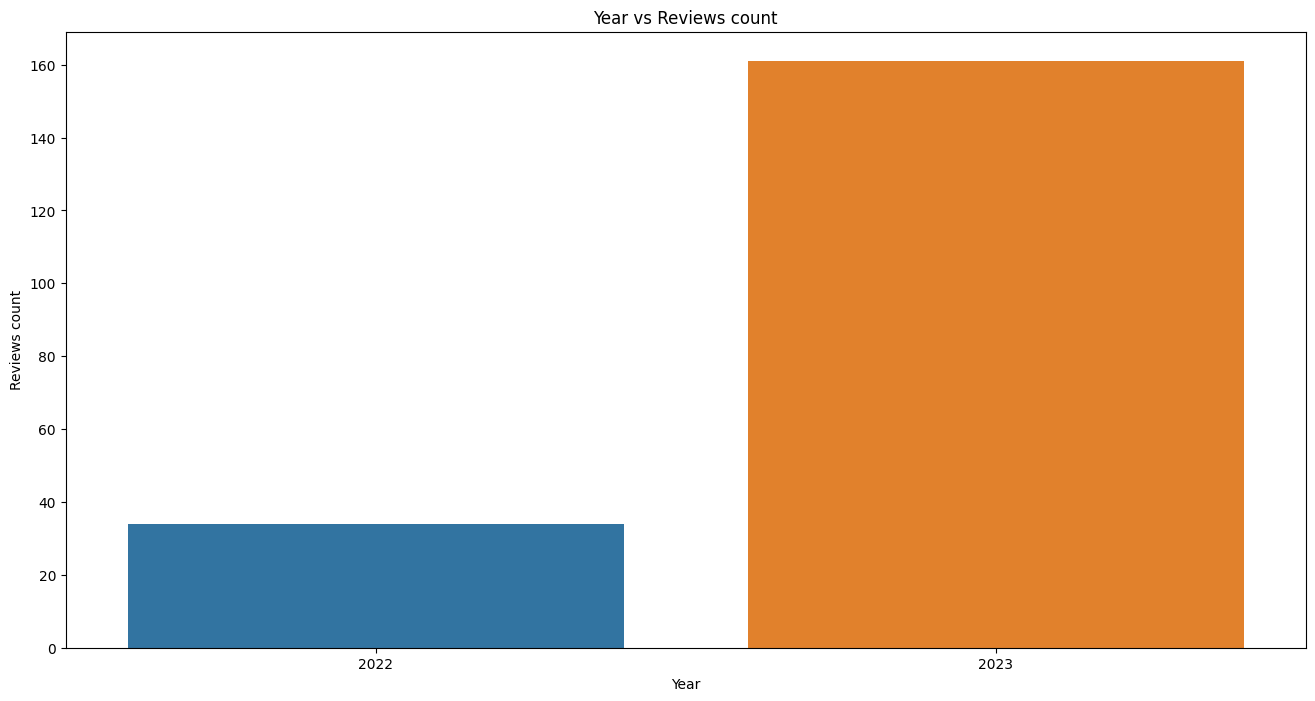

In [60]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Year')['Review'].count()).reset_index()
dayreview['Year'] = dayreview['Year'].astype('int64')
dayreview.sort_values(by = ['Year'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Year", y = "Review", data = dayreview)
plt.title('Year vs Reviews count')
plt.xlabel('Year')
plt.ylabel('Reviews count')
plt.show()

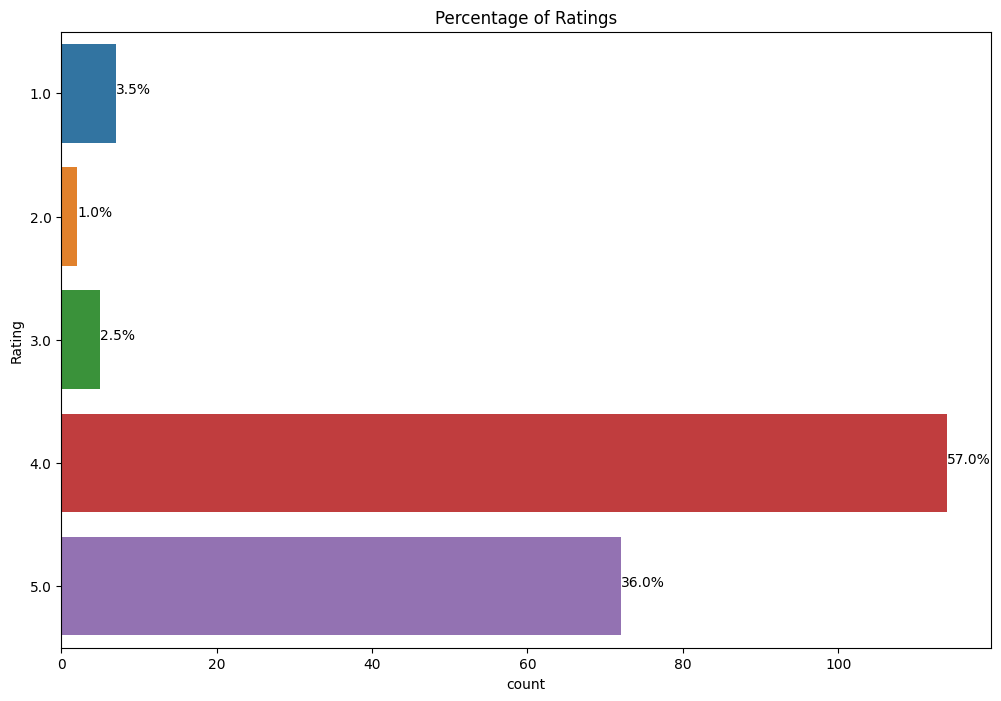

In [62]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

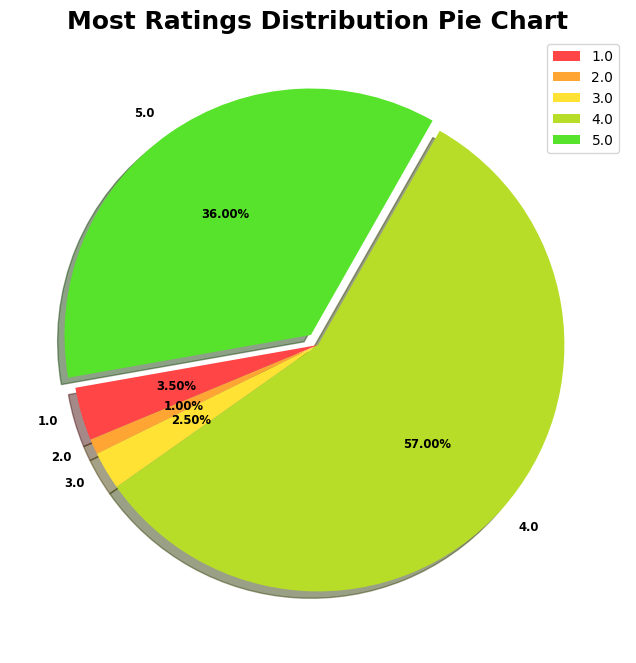

In [77]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

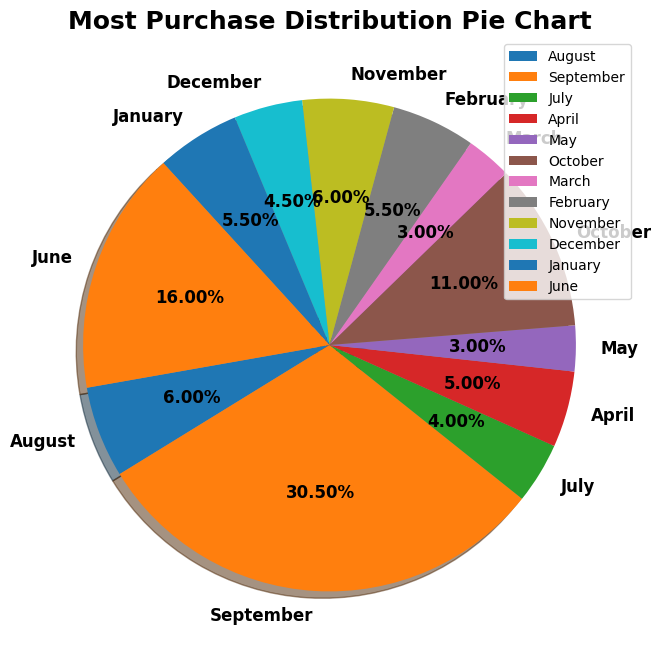

In [86]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts().sort_index(),
        labels=df['Month'].value_counts().index,
        explode =None,
        autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##**TEXT PRE_PROCESSING FOR SENTIMENTAL ANALYSIS**

In [163]:
df1

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11,9,2023
1,4.0,4.0 out of 5 stars\nOverall performance,Phone is good but battery support is weak no h...,9,9,2023
2,4.0,4.0 out of 5 stars\nGood Buy,Decent phone with all the required features in...,14,9,2023
3,4.0,4.0 out of 5 stars\nOkay Okay,Camera clarity not good,10,9,2023
4,4.0,4.0 out of 5 stars\nGood,Okay,12,9,2023
...,...,...,...,...,...,...
195,5.0,5.0 out of 5 stars\nNice,The media could not be loaded.\n ...,7,5,2023
196,5.0,5.0 out of 5 stars\nCamera Quality,Apple knows how to grab the customers from oth...,28,12,2022
197,5.0,5.0 out of 5 stars\nBest phone,NaN,17,3,2023
198,5.0,5.0 out of 5 stars\nIt's great but,The phone is amazing but full of software bugs...,6,3,2023


In [164]:
data = pd.DataFrame(reviewlist)
data

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nNot expecting More Perform...,Around this budget Phone is good and value for...,11 September 2023
1,4.0,4.0 out of 5 stars\nOverall performance,Phone is good but battery support is weak no h...,9 September 2023
2,4.0,4.0 out of 5 stars\nGood Buy,Decent phone with all the required features in...,14 September 2023
3,4.0,4.0 out of 5 stars\nOkay Okay,Camera clarity not good,10 September 2023
4,4.0,4.0 out of 5 stars\nGood,Okay,12 September 2023
...,...,...,...,...
195,5.0,5.0 out of 5 stars\nNice,The media could not be loaded.\n ...,7 May 2023
196,5.0,5.0 out of 5 stars\nCamera Quality,Apple knows how to grab the customers from oth...,28 December 2022
197,5.0,5.0 out of 5 stars\nBest phone,,17 March 2023
198,5.0,5.0 out of 5 stars\nIt's great but,The phone is amazing but full of software bugs...,6 March 2023


In [166]:
data.drop(['Rating'],axis=1,inplace=True)

In [167]:
data.drop(['Title'],axis=1,inplace=True)

In [168]:
data.drop(['Review_Date'],axis=1,inplace=True)

In [236]:
data

,Review,Sentiment
0,around this budget phone is good and value for...,2
1,phone is good but battery support is weak no h...,2
2,decent phone with all the required feature in ...,1
3,camera clarity not good,2
4,okay,2
...,...,...
195,the medium could not be loaded i liked very go...,2
196,apple know how to grab the customer from other...,2
197,,1
198,the phone is amazing but full of software bug ...,2


In [170]:
import re
def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    #text = emoji.replace_emoji(text, replace='')
    return text

In [173]:
data["Review"]=data["Review"].apply(cleaning)

In [174]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['Review'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['Review'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data
data=lemm(data)

In [175]:
data

,Review
0,around this budget phone is good and value for...
1,phone is good but battery support is weak no h...
2,decent phone with all the required feature in ...
3,camera clarity not good
4,okay
...,...
195,the medium could not be loaded i liked very go...
196,apple know how to grab the customer from other...
197,
198,the phone is amazing but full of software bug ...


In [177]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment and assign labels
def analyze_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)

    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each row in the DataFrame
data['Sentiment'] = data['Review'].apply(analyze_sentiment)

# Display the DataFrame with sentiment labels
print(data[['Review', 'Sentiment']])

                                                Review Sentiment
0    around this budget phone is good and value for...  Positive
1    phone is good but battery support is weak no h...  Positive
2    decent phone with all the required feature in ...   Neutral
3                              camera clarity not good  Positive
4                                                 okay  Positive
..                                                 ...       ...
195  the medium could not be loaded i liked very go...  Positive
196  apple know how to grab the customer from other...  Positive
197                                                      Neutral
198  the phone is amazing but full of software bug ...  Positive
199  great phone and ha best camera mp than any oth...  Positive

[200 rows x 2 columns]


<Axes: xlabel='Sentiment', ylabel='count'>

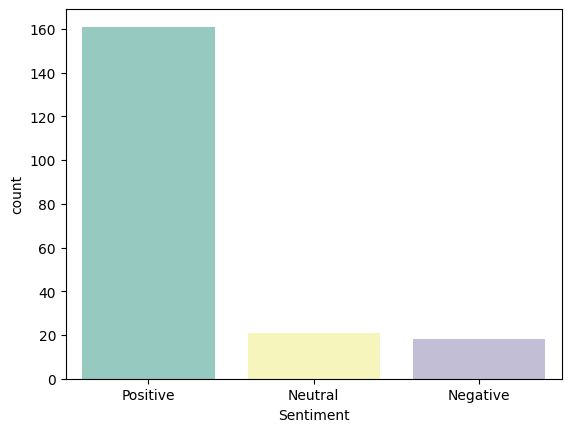

In [178]:
import seaborn as sns
sns.countplot(x='Sentiment',data=data,palette="Set3")

In [181]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sentiment']=encoder.fit_transform(data['Sentiment'])
data

,Review,Sentiment
0,around this budget phone is good and value for...,2
1,phone is good but battery support is weak no h...,2
2,decent phone with all the required feature in ...,1
3,camera clarity not good,2
4,okay,2
...,...,...
195,the medium could not be loaded i liked very go...,2
196,apple know how to grab the customer from other...,2
197,,1
198,the phone is amazing but full of software bug ...,2


In [183]:
removal=list(stopwords.words('english'))+list(punctuation)
stemmer=LancasterStemmer()
corpus=data['Review'].tolist()
print(len(corpus))

200


In [187]:
#1-->neutral,2-->postive,0-->negative
pos=data[data['Sentiment']==2]
pos_list=pos['Review'].tolist()
neg=data[data['Sentiment']==0]
neg_list=neg['Review'].tolist()

In [188]:
pos_all=''.join([word for sent in pos_list for word in sent])
print(pos_all)

around this budget phone is good and value for moneybut if expect and compare to real one plus like without nord performance is not up to the mark i took december till i got updatesperformance quite increasedgood to gophone is good but battery support is weak no hanging problem photo quality is good fast charging additional ram u can extend value for money and brand also goodcamera clarity not goodokayreally working good and fast compare to other mobile which is in same rangegood camara quality and fast performancecamera quality best haiuse karne me bhi sahi hi haiheating bahut jyada nahi haihang vali samasya dekhane ko milega lekin jyada nahi halka hang karega automatic vo sahi bhi ho jayeganice ph in this budgetgood for first time oneplus user compared to all mid range phone by oneplus this is good even though latest version are there ce is still a good mobile to go for i feel in this price segment worth to go for always there will be defective device if we go for any brand happy wit

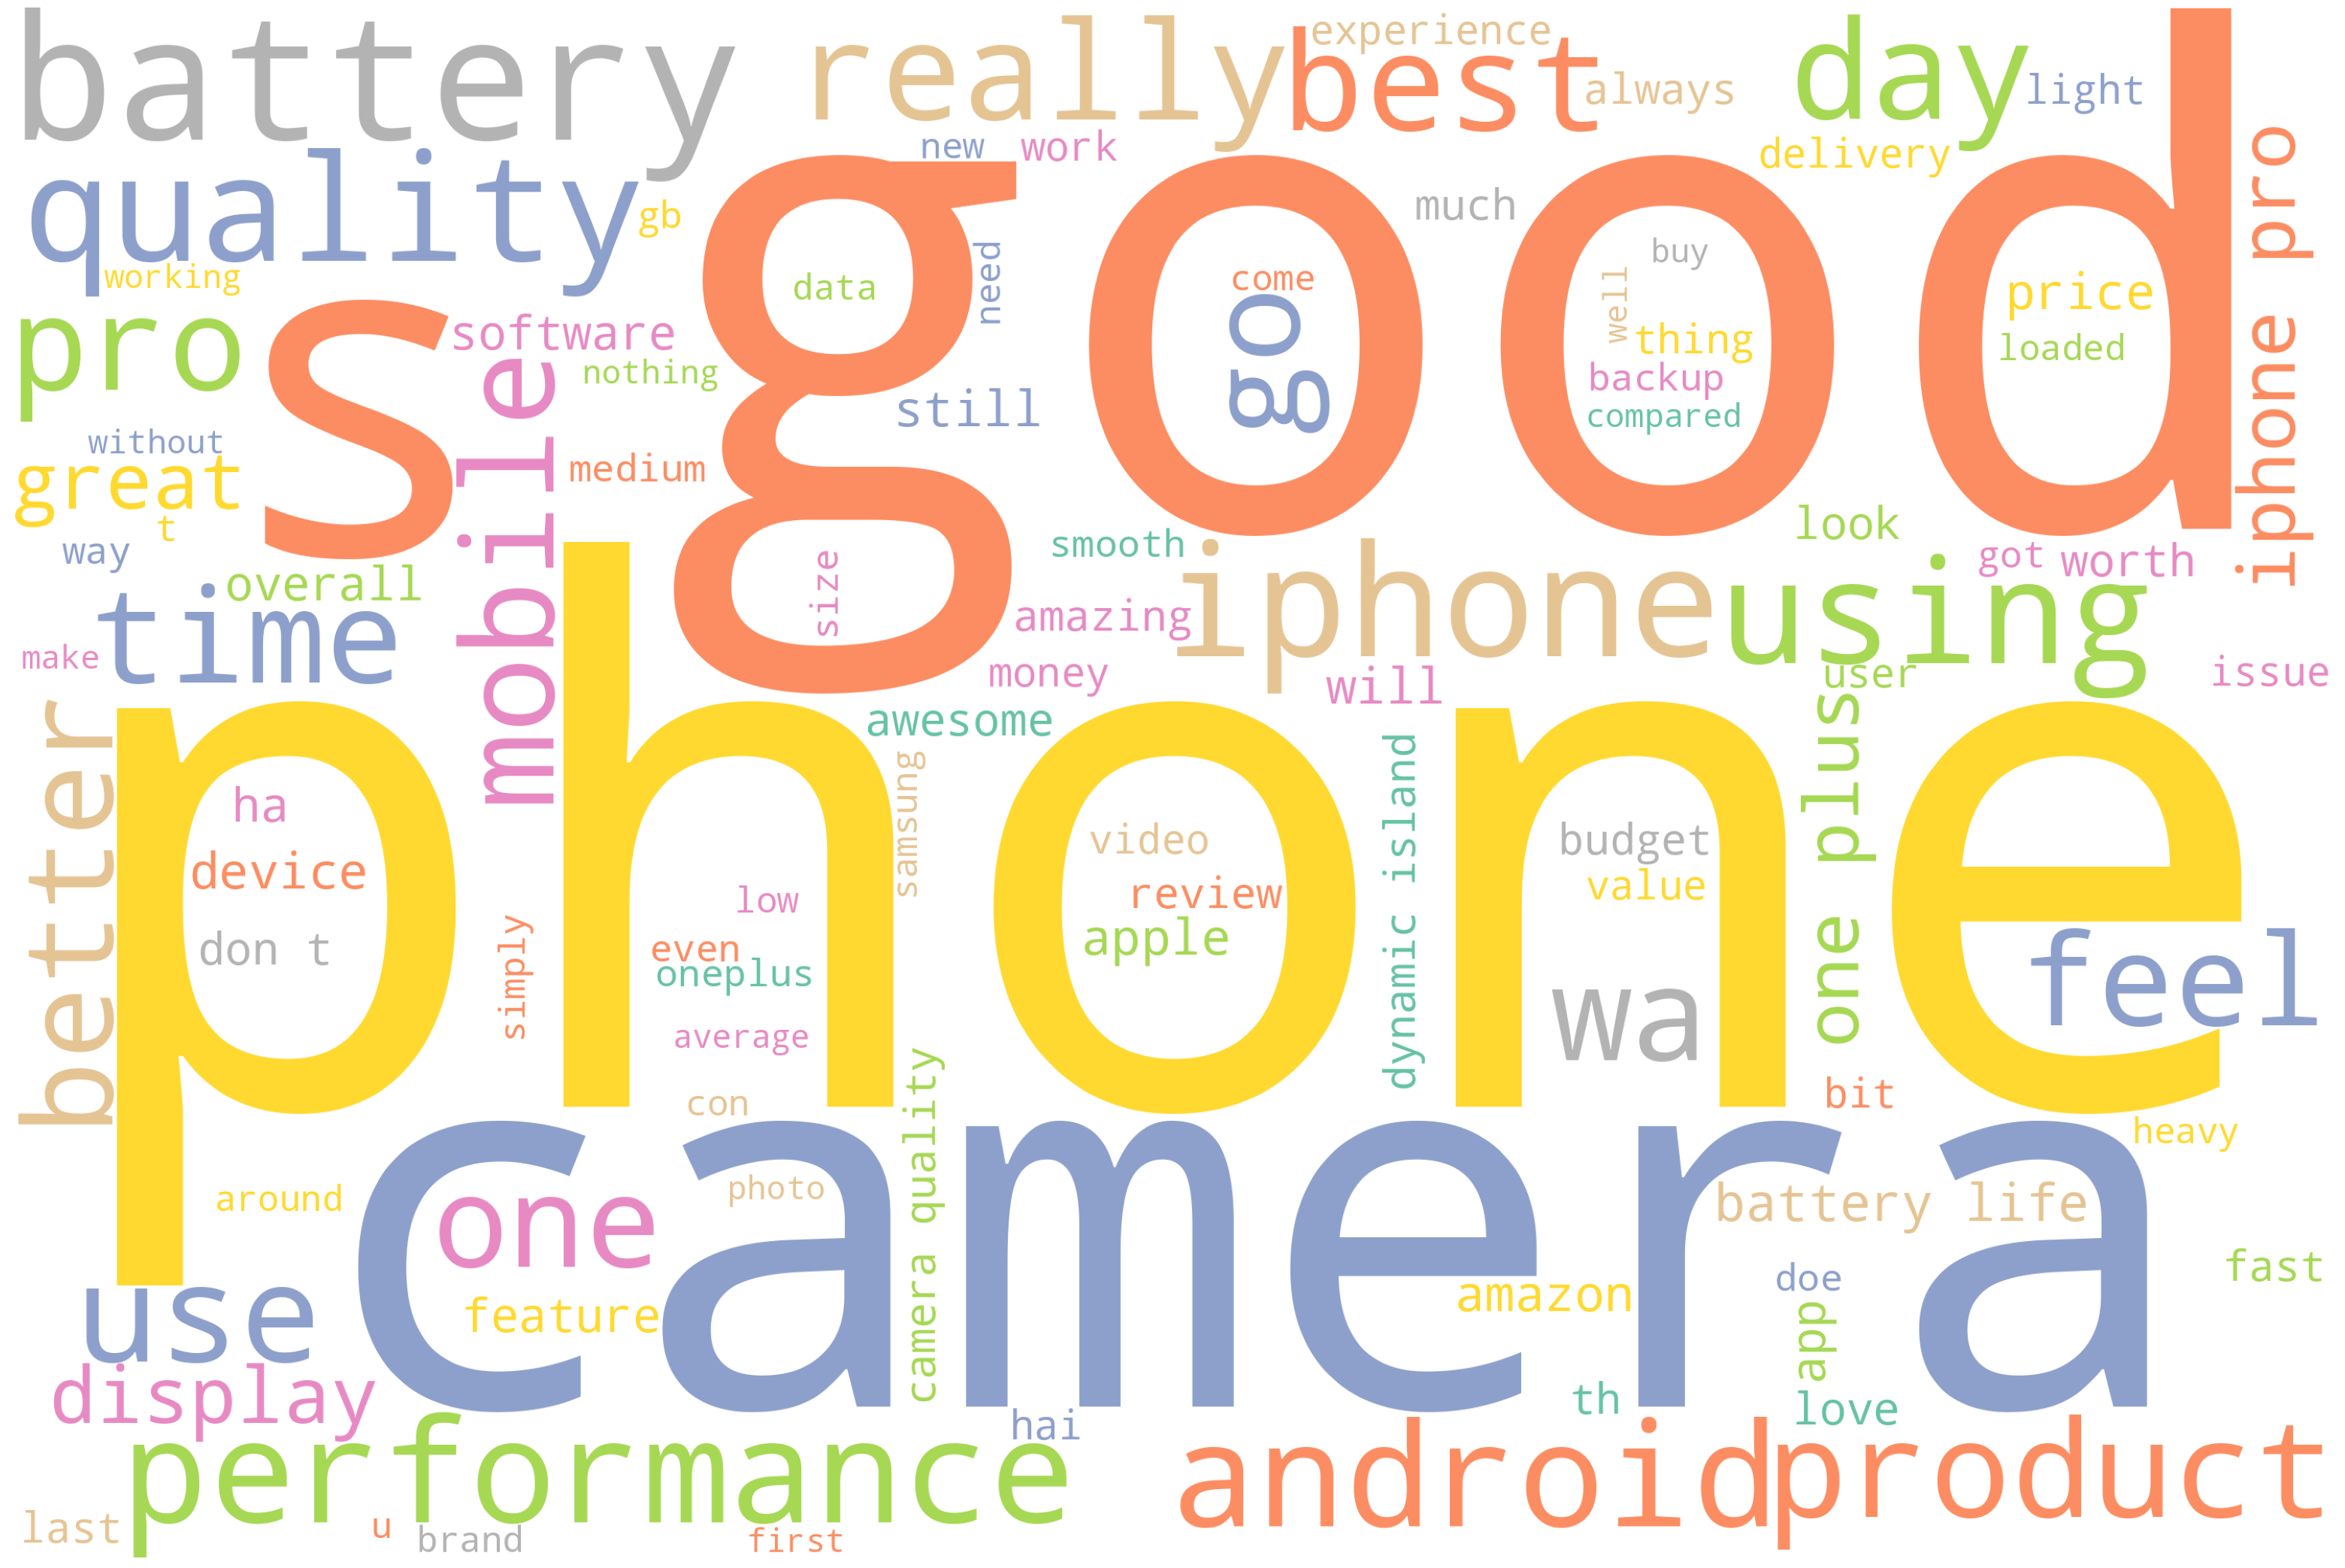

In [193]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(pos_all)
plot_cloud(wordcloud)

#**NAMED ENTITY RECOGONITION**

In [194]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=pos_all
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [229]:
for token in doc_block:
    print(token,token.pos_)

around ADP
this DET
budget NOUN
phone NOUN
is AUX
good ADJ
and CCONJ
value NOUN
for ADP
moneybut NOUN
if SCONJ
expect VERB
and CCONJ
compare VERB
to ADP
real ADJ
one NUM
plus CCONJ
like INTJ
without ADP
nord PROPN
performance NOUN
is AUX
not PART
up ADV
to ADP
the DET
mark NOUN
i PRON
took VERB
december PROPN
till SCONJ
i PRON
got VERB
updatesperformance NOUN
quite ADV
increasedgood NOUN
to ADP
gophone NOUN
is AUX
good ADJ
but CCONJ
battery NOUN
support NOUN
is AUX
weak ADJ
no DET
hanging VERB
problem NOUN
photo NOUN
quality NOUN
is AUX
good ADJ
fast ADV
charging VERB
additional ADJ
ram NOUN
u PRON
can AUX
extend VERB
value NOUN
for ADP
money NOUN
and CCONJ
brand NOUN
also ADV
goodcamera ADJ
clarity NOUN
not PART
goodokayreally ADV
working VERB
good ADJ
and CCONJ
fast ADJ
compare NOUN
to ADP
other ADJ
mobile NOUN
which PRON
is AUX
in ADP
same ADJ
rangegood NOUN
camara ADJ
quality NOUN
and CCONJ
fast ADJ
performancecamera NOUN
quality NOUN
best ADJ
haiuse NOUN
karne VERB
me PRON
bhi ADJ

In [230]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['budget', 'phone', 'value', 'moneybut', 'expect', 'compare', 'performance', 'mark', 'took', 'got', 'updatesperformance', 'increasedgood', 'gophone', 'battery', 'support', 'hanging', 'problem', 'photo', 'quality', 'charging', 'ram', 'extend', 'value', 'money', 'brand', 'clarity', 'working', 'compare', 'mobile', 'rangegood', 'quality', 'performancecamera', 'quality', 'haiuse', 'karne', 'sahi', 'haiheating', 'bahut', 'ph', 'budgetgood', 'time', 'oneplus', 'user', 'compared', 'range', 'phone', 'oneplus', 'version', 'mobile', 'go', 'feel', 'price', 'segment', 'go', 'device', 'go', 'brand', 'using', 'day', 'model', 'smooth', 'handle', 'software', 'volumn', 'look', 'moneynice', 'productone', 'phonegoodit', 'handle', 'day', 'day', 'task', 'storage', 'camera', 'performance', 'condition', 'leaf', 'desiredfirst', 'phone', 'value', 'money', 'price', 'plus', 'name', 'come', 'come', 'compare', 'time', 'stuck', 'performance', 'value', 'money', 'smartphonei', 'try', 'keep', 'review', 'review', 'persp

In [231]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df # viewing top ten results


,word,count
0,phone,83
1,camera,46
2,battery,39
3,iphone,33
4,quality,29
...,...,...
724,bug,1
725,premiumness,1
726,lotgreat,1
727,mp,1


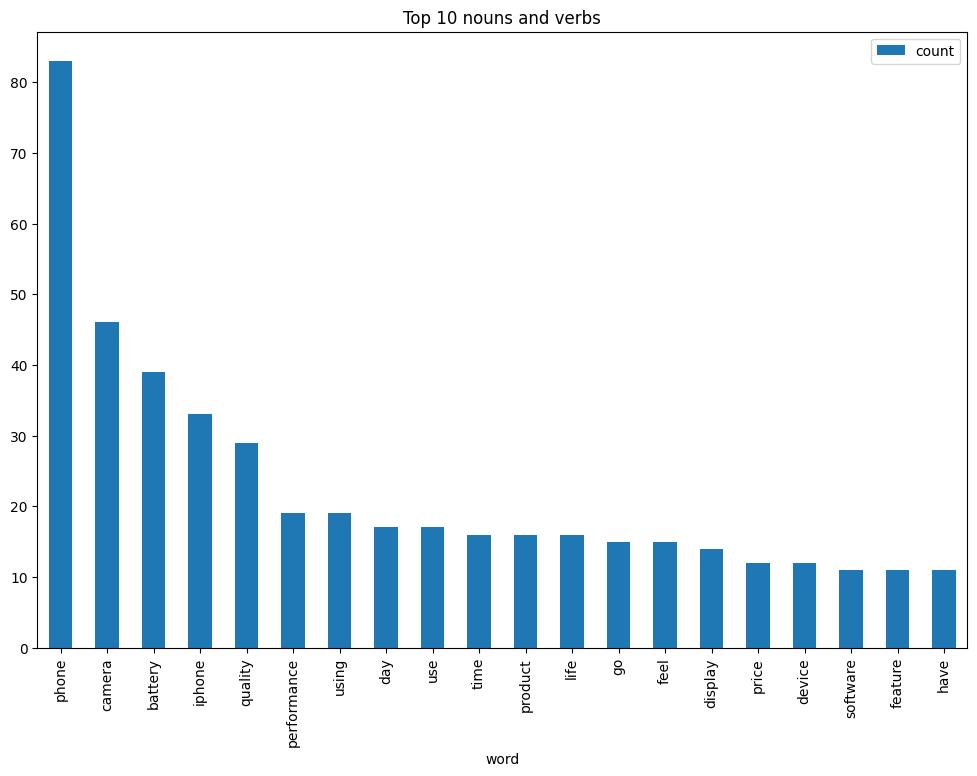

In [232]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:20].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [210]:
upload = files.upload()

Saving Afinn.csv to Afinn.csv


In [211]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [212]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [213]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [214]:
# manual testing
calculate_sentiment(text='great')

3